In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('iris.csv')
x = data.drop(['Species', 'Id'], axis=1)
y = data['Species']


In [3]:
x.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,5.1,3.8,1.5,0.3
138,6.0,3.0,4.8,1.8
35,5.0,3.2,1.2,0.2
121,5.6,2.8,4.9,2.0
114,5.8,2.8,5.1,2.4


In [4]:
y.sample(5)

36         Iris-setosa
65     Iris-versicolor
77     Iris-versicolor
99     Iris-versicolor
147     Iris-virginica
Name: Species, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9111111111111111

## Grid Search CV
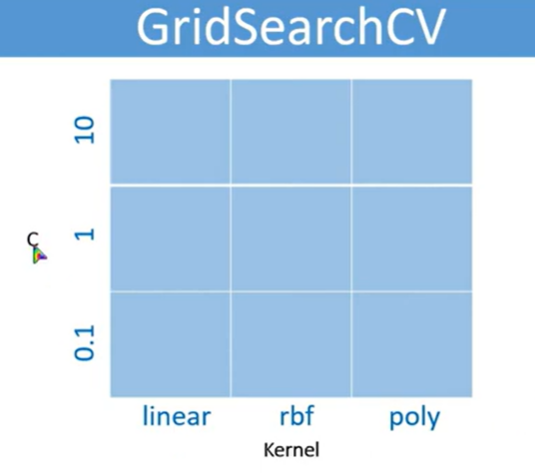

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10],
              'kernel':['rbf','linear', 'poly'],}

In [9]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [ ]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [11]:
grid_search.score(x_test, y_test)

0.9333333333333333

## Randomized Search CV
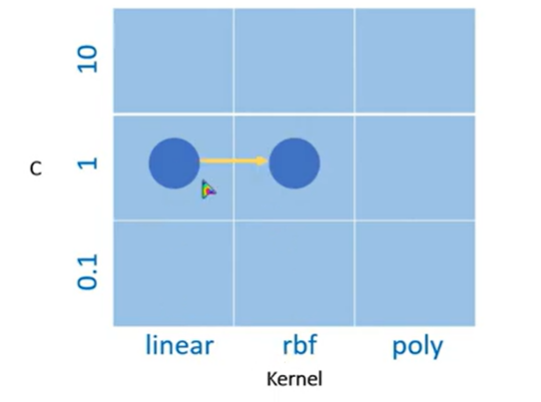

In [15]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'C':[0.1,1,10],
              'kernel': ['rbf', 'linear', 'poly']}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10)
random_search.fit(x_train, y_train)

c:\Users\wimuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']})

In [16]:
random_search.best_params_

{'kernel': 'linear', 'C': 1}

In [17]:
random_search.score(x_test, y_test)

0.9333333333333333